In [41]:
import folium
import base64
import matplotlib.pyplot as plt
from scipy import ndimage
from folium import IFrame
import pandas as pd
from folium.plugins import Search
import datetime
import json
import geopandas
import imdirect
import PIL
import os
#https://geopandas.org/gallery/create_geopandas_from_pandas.html
#https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/plugin-Search.ipynb

* Todo

* 1. Date로 Filtering
* 2. Date로 검색
* 3. Keyword로 Filtering
* 4. Keyword로 검색

https://stackoverflow.com/questions/57468332/folium-search-plugin-no-results-for-featuregroup

https://stackoverflow.com/questions/55312766/folium-make-geojson-search-marker-transparent

In [42]:
df = pd.read_excel('./data/유연노윤데이트.xlsx')
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.date.astype(str)
df['Keyword'] = df['Keyword'].fillna('')

In [43]:
gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.Lon, df.Lat), crs={'init': 'epsg:4326'})

In [44]:
m = folium.Map(location=[37.5139598,127.1069059], zoom_start=5)

In [45]:
def image_read(img_path, img_name):
    try:
        img = PIL.Image.open(img_path+img_name)
        img_rotated = imdirect.autorotate(img)
        img_rotated.save(img_name.replace('.jpg','')+'_rotate.jpg', "JPEG", quality=100, optimize=True, progressive=True)
        img = plt.imread(img_name.replace('.jpg','')+'_rotate.jpg')
        os.remove(img_name.replace('.jpg','')+'_rotate.jpg')
    except:
        img = plt.imread(img_path+img_name)
    return img
def to_compatibility(ix = 0):
    imgs = [image_read('./data/', x) for x in df.loc[ix, 'Image'].split(';')]
    if len(imgs)==3:
        fig = plt.figure()
        a = fig.add_subplot(1, 3, 1)
        plt.axis('off')
        imgplot = plt.imshow(ndimage.rotate(imgs[0], 0))
        b = fig.add_subplot(1, 3, 2)
        plt.axis('off')
        imgplot = plt.imshow(ndimage.rotate(imgs[1], 0))
        c = fig.add_subplot(1, 3, 3)
        plt.axis('off')
        imgplot = plt.imshow(ndimage.rotate(imgs[2], 0))
        fig.savefig('%s.png'%ix)

    elif len(imgs)==2:
        fig = plt.figure()
        a = fig.add_subplot(1, 2, 1)
        plt.axis('off')
        imgplot = plt.imshow(ndimage.rotate(imgs[0], 0))
        b = fig.add_subplot(1, 2, 2)
        plt.axis('off')
        imgplot = plt.imshow(ndimage.rotate(imgs[1], 0))
        fig.savefig('%s.png'%ix)

    elif len(imgs)==1:
        fig = plt.figure()
        a = fig.add_subplot(1, 1, 1)
        plt.axis('off')
        imgplot = plt.imshow(ndimage.rotate(imgs[0], 0))
        fig.savefig('%s.png'%ix)

def to_map(encoded, lat, lon, date='2020-03-16'):
    resolution, width, height = 75, 7, 3
    html = '<img src="data:image/png;base64,{}">'.format
    iframe = IFrame(html(encoded), width=(width*resolution)+20, height=(height*resolution)+20)
    popup = folium.Popup(iframe, max_width=2650)

    icon = folium.Icon(color="red", icon="ok")
    marker = folium.Marker(location=[lat,lon], popup=popup, icon=icon,
                  tooltip=date)
    x = marker.add_to(m)

In [46]:
df

,Date,Lat,Lon,Image,Keyword,geometry
0,2020-03-15,37.574427,126.983337,0.jpg;5.jpg,2020.03.15 인사동 미니언즈,POINT (126.9833369 37.5744271)
1,2020-03-15,37.554370,127.109021,1.jpg,2020.03.15 워커힐 호텔 수영장,POINT (127.1090209 37.55437)
2,2020-03-16,37.509747,127.100830,2.jpg,2020.03.16 석촌호수,POINT (127.1008297 37.5097473)
3,2020-03-16,37.513964,127.106906,3.jpg;4.jpg,2020.03.16 방이동 라디오헤드,POINT (127.1069059 37.513964)
4,2019-12-01,37.569294,126.985569,6.jpg,종각역 보드게임 보드스토리,POINT (126.9855689 37.5692938)
5,2019-12-01,37.569892,126.983975,7.jpg,종각역 스타벅스,POINT (126.9839749 37.5698918)
6,2019-12-03,37.564733,126.853525,8.jpg,유연이집,POINT (126.8535251 37.5647326)
7,2019-12-04,37.582655,126.979787,9.jpg,처음 꽃다발 받은 날 수와래 북촌,POINT (126.9797865 37.5826553)
8,2019-12-04,37.579003,126.980188,10.jpg;11.jpg,올라프 겨울왕국 팝업스토어,POINT (126.9801884 37.5790026)


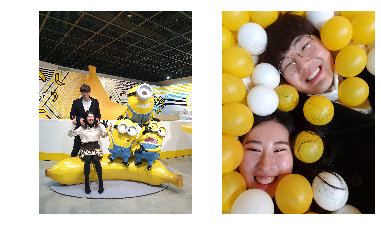

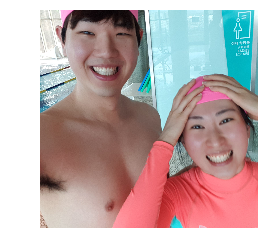

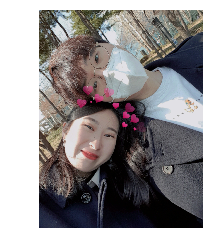

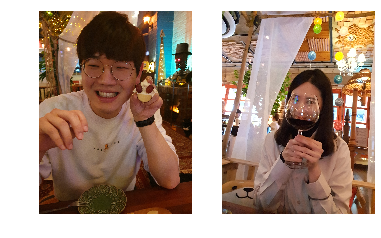

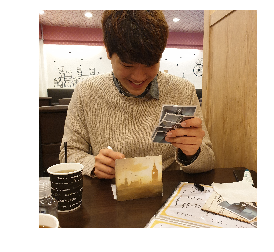

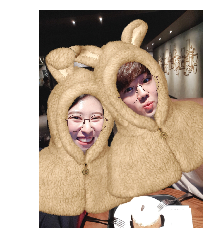

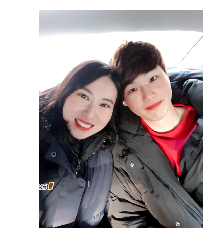

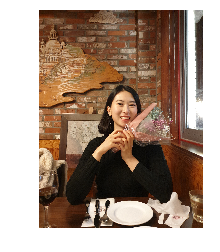

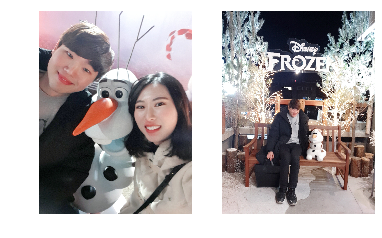

In [47]:
for ix in list(df.index):
    to_compatibility(ix)
    encoded = base64.b64encode(open('%s.png'%ix, 'rb').read()).decode()
    to_map(encoded, df.loc[ix, 'Lat'], df.loc[ix, 'Lon'], str(df.loc[ix, 'Date'])+' '+df.loc[ix, 'Keyword'])

In [48]:
dategeo = folium.GeoJson(
    gdf.to_crs(epsg='4326'),
    name='Date',
    tooltip=folium.GeoJsonTooltip(
        fields=['Date'],
        aliases=['Date'], 
        localize=False
    )
).add_to(m)

datesearch = Search(
    layer=dategeo,
    geom_type='Point',
    placeholder='Search for a Date',
    collapsed=True,
    search_label='Date',
    weight=3, position='topleft'
).add_to(m)

In [49]:
keywordgeo = folium.GeoJson(
    gdf,
    name='Keyword',
    tooltip=folium.GeoJsonTooltip(
        fields=['Keyword'],
        aliases=['Keyword'], 
        localize=False
    )
).add_to(m)

datesearch = Search(
    layer=dategeo,
    geom_type='Point',
    placeholder='Search for a Keyword',
    collapsed=True,
    search_label='Keyword',
    weight=3, position='topright'
).add_to(m)

In [50]:
folium.LayerControl().add_to(m)

In [51]:
m

In [52]:
m.save('version_%s.html'%str(datetime.datetime.now().date()).replace('-',''))